## Preprocessing

In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("Resources/charity_data.csv")
df.head()

# Target variable is 'IS_SUCCESSFUL', the features are all the other variables besides 'EIN' and 'NAME'

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = df.drop(labels=['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Cutoff at 200
type_list = application_df['APPLICATION_TYPE'].value_counts().index.tolist()
application_types_to_replace = []
for value in type_list:
  if application_df['APPLICATION_TYPE'].value_counts()[value] < 200:
    application_types_to_replace.append(value)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1] 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Cutoff at 1000
class_list = application_df['CLASSIFICATION'].value_counts().index.tolist()
classifications_to_replace = []
for value in class_list:
  if application_df['CLASSIFICATION'].value_counts()[value] < 1000:
    classifications_to_replace.append(value)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_df = pd.get_dummies(application_df)

In [14]:
# View the column names
dummy_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [15]:
# Split our preprocessed data into our features and target arrays
y = dummy_df['IS_SUCCESSFUL'].values
X = dummy_df.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 9,131
Trainable params: 9,131
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.5694 - accuracy: 0.7190
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7284
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7304
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7331
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7322
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7310
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5478 - accuracy: 0.7323
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7338
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7335
Epoch 10/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7398
Epoch 82/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7401
Epoch 83/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7405
Epoch 84/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7407
Epoch 85/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7402
Epoch 86/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7402
Epoch 87/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7402
Epoch 88/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7403
Epoch 89/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7403
Epoch 90/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7416
Epoch 161/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7413
Epoch 162/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7418
Epoch 163/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7411
Epoch 164/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7419
Epoch 165/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7418
Epoch 166/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7421
Epoch 167/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7420
Epoch 168/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7416
Epoch 169/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - a

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6057 - accuracy: 0.7272 - 396ms/epoch - 1ms/step
Loss: 0.6056885123252869, Accuracy: 0.7272303104400635


In [21]:
# Export our model to HDF5 file
nn.save('Resources/AlphabetSoupCharity_Optimization.h5')

# Report

## Overview
The purpose of this analysis is to explain each step of the process for this model, the results of this model, and recommendations for how this problem can be solved differently in the future.

## Results

### Data Preprocessing
- The target for this model was the "IS_SUCCESSFUL" column, indicating whether or not the organization used its funding money effectively.
- The features for this model are the rest of the columns in the dataset. Some of the features include the type of application, the use case for funding, and the funding amount requested.
- The "EIN" and "NAME" variables were removed from the input data because they are simply identifiers. They are not targets or features.

### Compiling, Training, and Evaluating the Model
- I selected two hidden layers for this model, the first with 80 neurons and the second with 30. Because this is a large dataset with over 34,000 rows, I wanted to use a good number of neurons in the layers, especially since two were used in the interest of time. I used the relu activation function for both, since it is one of the more popular activation functions in that it is simple to use and has fewer limitations than some other popular functions.
- I was not able to achieve the target model performance of over 75%. This model had an accuracy just over 73%.

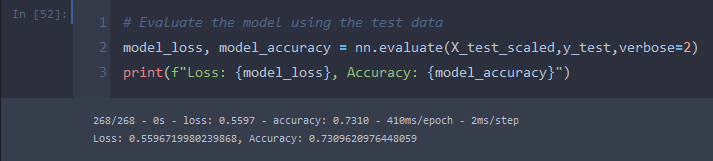

- I took 3 steps to increase model performance. I added a third hidden layer with 30 neurons, and added 20 neurons to the second hidden layer. I also added 100 epochs to the training.

## Summary

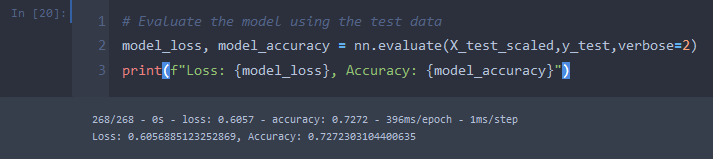

Overall, the attempts at optimizing the model actually made it slightly less accurate, going down to about 72.7%. Nonetheless, this model correctly predicts whether an organization will effectively use its funding money just over 70% of the time. A different model might benefit from adding several more hidden layers, as adding just one did not seem to help. The number of epochs could also be significantly reduced in order to save time and try different optimization methods. From epoch 100 to 200, the difference in accuracy was only 0.0007. 